# Classification after Clustering with Agglomerative Clustering 

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

df = pd.read_csv('/Users/shuchi/Desktop/MLProjects/Customer segmentation/data/clustered_data.csv')
print(df.shape)
print('-'*20)
df.head(10)

(2240, 22)
--------------------


,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth,cluster
0,68,2,0,0,0,58138.0,1617.0,4823.0,58,635,81,546,120.5,81,88.0,8,10,4,3,0,7,0
1,71,2,0,1,2,46344.0,27.0,4273.0,38,11,1,6,2.0,1,6.0,1,1,2,2,0,5,1
2,60,2,1,0,0,71613.0,776.0,4472.0,26,426,49,127,111.0,21,42.0,8,2,10,1,0,4,0
3,41,2,1,1,1,26646.0,53.0,4299.0,26,11,4,20,10.0,3,5.0,2,0,4,2,0,6,1
4,44,4,1,1,1,58293.0,422.0,4321.0,94,173,43,118,46.0,27,15.0,5,3,6,5,0,5,2
5,58,3,1,1,1,62513.0,716.0,4453.0,16,520,42,98,0.0,42,14.0,6,4,10,2,0,6,2
6,54,2,0,1,1,55635.0,590.0,4753.0,34,235,65,164,50.0,49,27.0,7,3,7,4,0,6,2
7,40,4,1,1,1,33454.0,169.0,4577.0,32,76,10,56,3.0,1,23.0,4,0,4,2,0,8,1
8,51,4,1,1,1,30351.0,46.0,4548.0,19,14,0,24,3.0,3,2.0,3,0,2,1,0,9,1
9,75,4,1,1,2,5648.0,49.0,4268.0,68,28,0,6,1.0,1,13.0,1,0,0,1,1,20,1


In [11]:
x = df.drop('cluster', axis = 1)
y = df['cluster']

## Grid Search - To select the best model

In [12]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn import metrics 

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [26]:
def evaluate_models(X,y,models):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state= 42)

    model_lst = []
    scores = []

    for i in range (len(list(models))):
        model = list(models.values())[i]
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)

        score = accuracy_score(y_test, y_pred)

        model_name = list(models.keys())[i]
        print(f'-----score for ----{model_name}---')
        print(f'{score}')
        model_lst.append(model_name)
        scores.append(score)

    print()

    report = pd.DataFrame()
    report['Model Name'] = model_lst
    report['Score'] = scores
    return report


In [27]:
report = evaluate_models(x , y , models)

-----score for ----Random Forest---
0.9665178571428571
-----score for ----Decision Tree---
0.9553571428571429
-----score for ----Gradient Boosting---
0.96875
-----score for ----Logistic Regression---
0.8772321428571429
-----score for ----K-Neighbors Classifier---
0.8102678571428571
-----score for ----AdaBoost Classifier---
0.9486607142857143



In [28]:
report.head()

,Model Name,Score
0,Random Forest,0.966518
1,Decision Tree,0.955357
2,Gradient Boosting,0.968750
3,Logistic Regression,0.877232
4,K-Neighbors Classifier,0.810268


In [29]:
report.sort_values('Score')

,Model Name,Score
4,K-Neighbors Classifier,0.810268
3,Logistic Regression,0.877232
5,AdaBoost Classifier,0.948661
1,Decision Tree,0.955357
0,Random Forest,0.966518
2,Gradient Boosting,0.968750


- ### From the report above we can see that the gradient boosting model performed the best, so we will continue training our model using gradient boosting algorithm.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train

,Age,Education,Marital Status,Parental Status,Children,Income,Total_Spending,Days_as_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Web,Catalog,Store,Discount Purchases,Total Promo,NumWebVisitsMonth
792,75,2,0,0,0,16813.0,50.0,4505.0,49,4,8,11,12.0,2,13.0,2,0,3,1,1,7
1271,62,3,0,1,1,64191.0,825.0,4683.0,30,420,15,186,120.5,38,15.0,5,3,13,3,0,3
1538,54,4,1,1,1,71969.0,1086.0,4781.0,59,1000,0,76,0.0,0,10.0,3,4,9,3,1,8
668,57,4,1,1,1,29187.0,34.0,4576.0,43,26,0,6,0.0,0,2.0,1,0,3,1,0,8
1975,56,2,1,1,1,4428.0,359.0,4427.0,0,16,4,12,2.0,4,126.5,25,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,56,2,1,1,2,44078.0,41.0,4170.0,17,24,1,10,2.0,0,4.0,2,0,3,2,0,5
1095,46,2,0,1,1,61825.0,424.0,4486.0,56,162,50,100,55.0,30,27.0,4,2,8,1,0,4
1130,74,3,1,1,1,67381.0,957.0,4690.0,67,815,8,53,11.0,0,70.0,2,2,9,4,1,7
1294,62,4,0,1,2,48918.0,62.0,4238.0,21,52,0,9,0.0,0,1.0,1,0,4,2,0,4


### Hyperparameter tuning

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0,1, 0.2],
    'max_depth': [3,5,7]
}

grad = GradientBoostingClassifier()
grad_cv = GridSearchCV(grad, params, cv = 5, scoring= 'accuracy', n_jobs= -1)
grad_cv.fit(x_train, y_train)

print('tuned hyperparameters (best parameters):', grad_cv.best_params_)
print('accuracy:', grad_cv.best_score_)

tuned hyperparameters (best parameters): {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
accuracy: 0.9648402608113786


In [38]:
best_grad_model = GradientBoostingClassifier(
    n_estimators= 50,
    learning_rate= 0.2,
    max_depth= 5
)

In [39]:
best_model = best_grad_model.fit(x_train, y_train)
y_pred = best_grad_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)


print('Greadient Boosting Classifier')
print('Accuracy Score : {:4f}'.format(score))
print(cr)

Greadient Boosting Classifier
Accuracy Score : 0.966518
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       128
           1       0.98      0.98      0.98       167
           2       0.94      0.97      0.96       153

    accuracy                           0.97       448
   macro avg       0.97      0.97      0.97       448
weighted avg       0.97      0.97      0.97       448



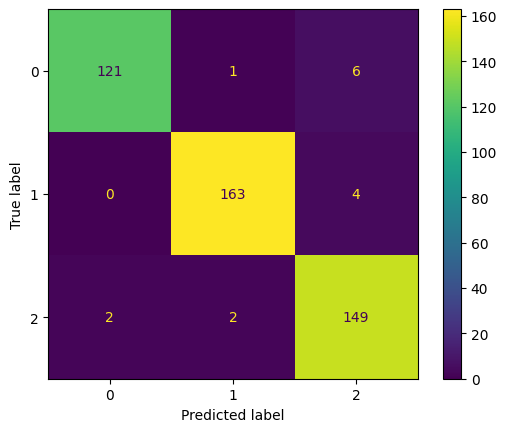

In [40]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)